<a href="https://colab.research.google.com/github/rony23-byte/creditMachine-Learning/blob/main/loan_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries for data preprocessing ,building the model, fitting our models 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from  sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc,confusion_matrix
import tensorflow as tf
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import seaborn as sns



Loading the dataset and view it

In [ ]:
loans=pd.read_csv("/content/credit_risk_dataset.csv")
loans.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


check for missing values in our dataset and handle them


In [ ]:
loans.info()
print(loans.isnull().sum())
clean_data=loans.dropna()
print(clean_data.isnull().sum())
loans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
person_age                     

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Now we want to encode the categorical variables using the labelencoder


In [ ]:
numerical_cols=['loan_int_rate','person_income','person_emp_length','person_age','loan_amnt','loan_percent_income','cb_person_cred_hist_length']
categorical_cols=['loan_grade','person_home_ownership','loan_intent','cb_default_on_file']
maper=DataFrameMapper([('loan_grade',sklearn.preprocessing.LabelBinarizer()),
 ('person_home_ownership',sklearn.preprocessing.LabelBinarizer()),
 ('loan_intent',sklearn.preprocessing.LabelBinarizer()),
          ('cb_person_default_on_file',sklearn.preprocessing.LabelBinarizer())])
features=[
          'loan_grade','person_home_ownership','loan_intent','cb_default_on_file','loan_int_rate','person_income','person_emp_length','person_age','loan_amnt','loan_percent_income','cb_person_cred_hist_length'
]
response='loan_status'
X1=maper.fit_transform(clean_data)
X2=np.array(clean_data[numerical_cols])
X=np.hstack((X1,X2))
y=np.array(clean_data['loan_status'])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


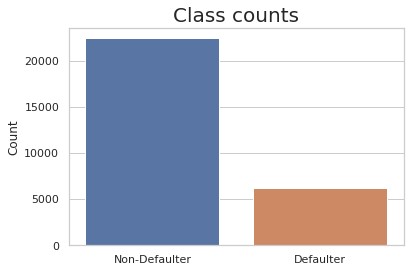

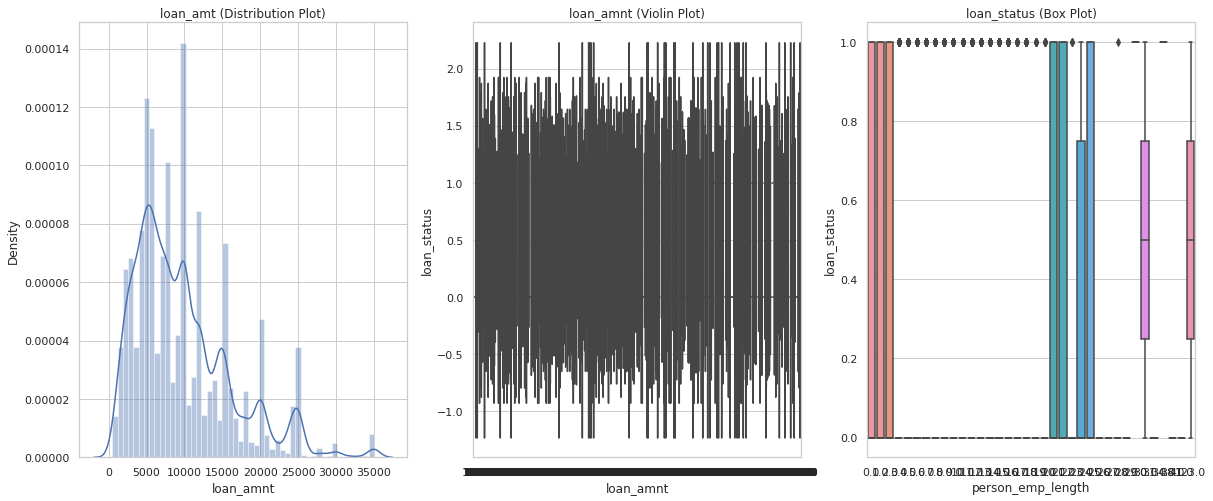

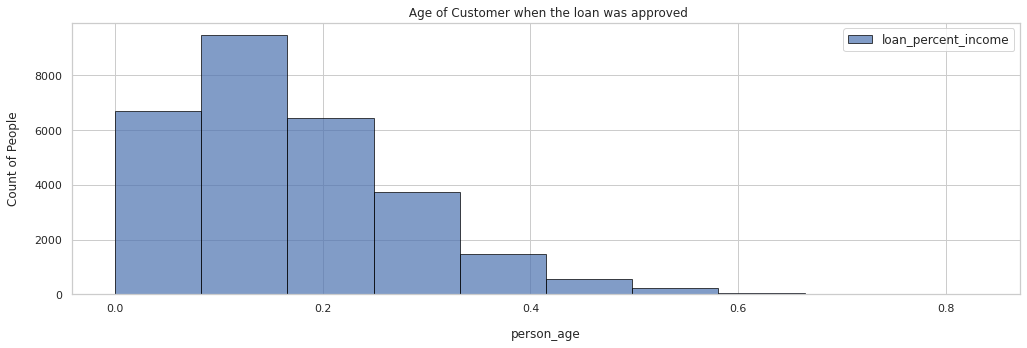

In [ ]:
#trying to have a detailed overview to see our dataset
# Getting the number of positive and negative examples.
sns.countplot(clean_data['loan_status'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})
clean_data['loan_status'].value_counts()
sns.set(style="whitegrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("loan_amt (Distribution Plot)")
sns.distplot(clean_data['loan_amnt'],ax=ax[0])
ax[1].set_title("loan_amnt (Violin Plot)")
sns.violinplot(data =clean_data, x='loan_amnt',y='loan_status',ax=ax[1],inner=
"quartile")
ax[2].set_title("loan_status (Box Plot)")
sns.boxplot(data =clean_data, x='person_emp_length',y='loan_status',ax=ax[
2],orient='v')
plt.figure(figsize=(17,5))
52
#barplot\
clean_data['loan_percent_income'].plot(kind='hist',color='b'
,alpha=0.7, edgecolor='black')
plt.xlabel("person_age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

The data is well cleaned.we could now split into training set and testing set then fit it or standard scale before we start fitting it into the neural networks



In [ ]:
#checking the number of defaulters and non-defaulters


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#standardizing our data  since we want values ranging from -3 to 3
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Initializa our nerual network model , build it and fit 


In [ ]:
#initialize ANN
ann=tf.keras.models.Sequential()


Start creating our hidden layers


In [ ]:
#adding the first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#adding the 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#creating the output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#compiling the neural network
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#fitting ann
model_train=ann.fit(X_train,y_train,batch_size=32,epochs=100)


Epoch 1/100
716/716 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.7987
Epoch 2/100
716/716 [==============================] - 1s 1ms/step - loss: 0.3400 - accuracy: 0.8666
Epoch 3/100
716/716 [==============================] - 1s 1ms/step - loss: 0.3203 - accuracy: 0.8738
Epoch 4/100
716/716 [==============================] - 1s 1ms/step - loss: 0.3117 - accuracy: 0.8787
Epoch 5/100
716/716 [==============================] - 1s 1ms/step - loss: 0.3055 - accuracy: 0.8828
Epoch 6/100
716/716 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8877
Epoch 7/100
716/716 [==============================] - 1s 1ms/step - loss: 0.2930 - accuracy: 0.8923
Epoch 8/100
716/716 [==============================] - 1s 1ms/step - loss: 0.2872 - accuracy: 0.8954
Epoch 9/100
716/716 [==============================] - 1s 1ms/step - loss: 0.2827 - accuracy: 0.8996
Epoch 10/100
716/716 [==============================] - 1s 1ms/step - loss: 0.2793 - accura

In [ ]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 156       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 2)                 14        
                                                                 
 dense_6 (Dense)             (None, 6)                 1

In [ ]:
#checking our dataset
X_test


array([[-0.69950438, -0.68116908,  2.00492383, ..., -0.89404706,
        -1.12214917, -0.9364128 ],
       [-0.69950438, -0.68116908,  2.00492383, ..., -0.68885426,
        -0.46321432,  0.3055672 ],
       [-0.69950438,  1.4680643 , -0.49877207, ..., -0.26268458,
        -0.65148142,  2.54113119],
       ...,
       [-0.69950438, -0.68116908,  2.00492383, ..., -1.3360008 ,
        -1.31041628, -0.4396208 ],
       [-0.69950438,  1.4680643 , -0.49877207, ...,  2.42060596,
         1.13705605, -0.4396208 ],
       [-0.69950438,  1.4680643 , -0.49877207, ...,  2.42060596,
         1.51359025, -0.9364128 ]])

In [ ]:

#predicting the results for the test dataset
y_pred=ann.predict(X_test)
y_pred=[1 if y>0.5 else 0 for y in y_pred]
y_pred



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#checking the length of the prediction
len(y_pred)
import seaborn as sns

In [ ]:
#building the  random forest model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini'n_estimators=40,max_features='auto',min_samples_leaf=1,n_jobs=1,)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
#finding the accuracy of the model through the use of the confusion matrix
model.score(X_test,y_test)
y_pred=model.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#finding the f1_score
f1_score(y_test,y_pred,average='weighed')
#finding the recall score
recall_score(y_tes)
                    



Text(69.0, 0.5, 'Actual')

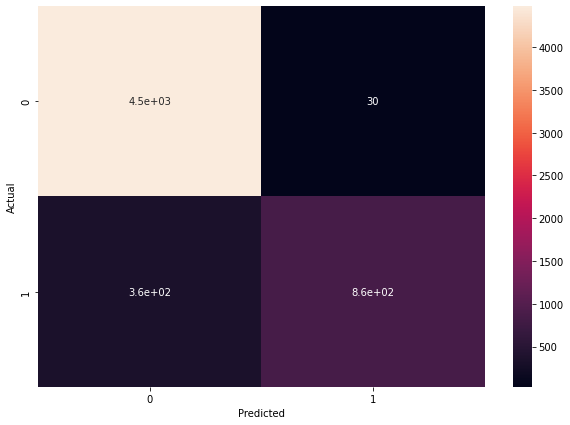

In [ ]:
 #confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')




In [ ]:
! git clone https://github.com/rony23-byte/Credit-Scoring.git
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/rony23-byte/Credit-Scoring.git
!git push -u origin main

Cloning into 'Credit-Scoring'...
Initialized empty Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@f132f136cce1.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/rony23-byte/Credit-Scoring.git'


In [ ]:
!git remote add origin https://github.com/rony23-byte/Credit-Scoring.git
!git branch -M main
!git push -u origin main

fatal: remote origin already exists.
error: refname refs/heads/master not found
fatal: Branch rename failed
